In [3]:
import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [7]:
with sqlite3.connect("../db.sqlite3") as conn:
    query = """
    SELECT *
    FROM restaurant_orderitem
    JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
    JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
    """
    df = pd.read_sql(query, conn)
    
df.to_csv("restaurant.csv")
len(df)

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

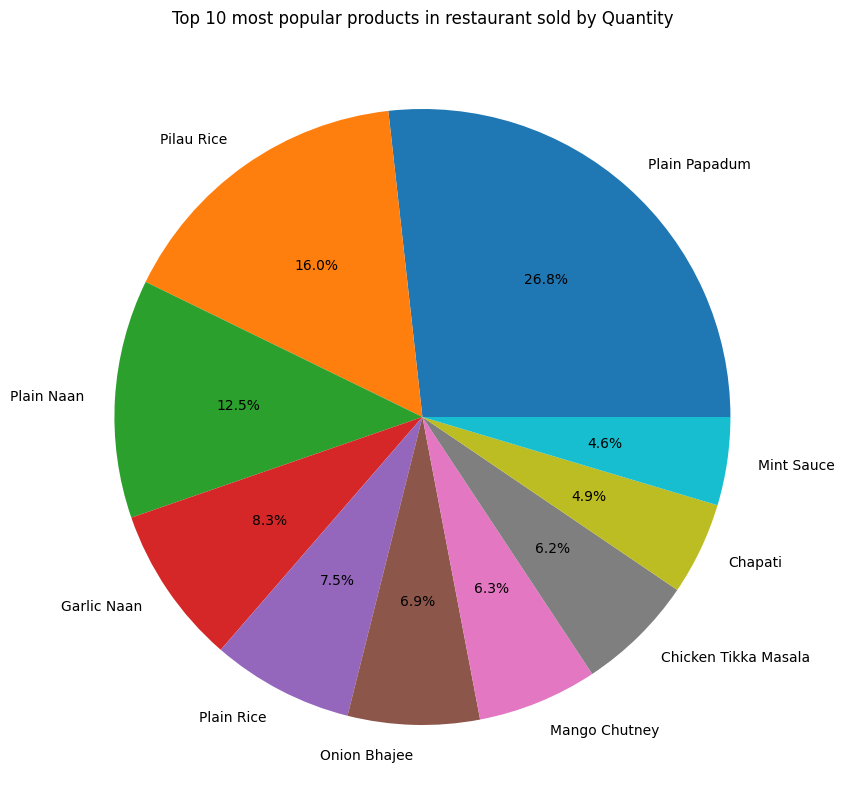

In [8]:
Top_10_most_popular_products = df.groupby("name").sum().sort_values(by="quantity", ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.title("Top 10 most popular products in restaurant sold by Quantity")
plt.pie(Top_10_most_popular_products["quantity"], labels=Top_10_most_popular_products.index, autopct="%1.1f%%")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

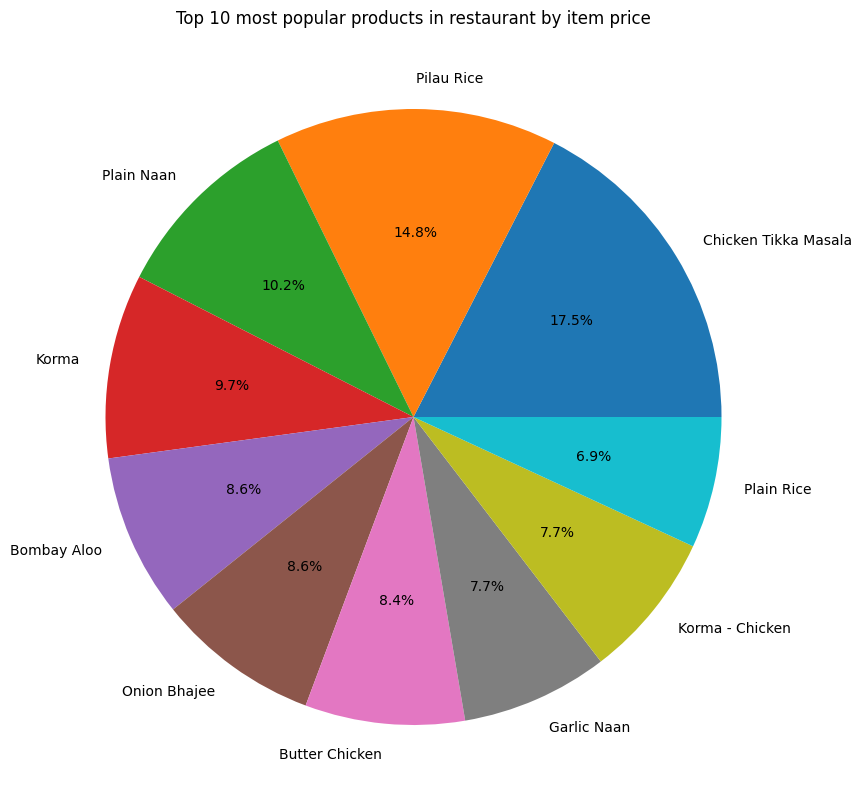

In [10]:
df["item_price"] = df["price"] * df["quantity"]
top_10_sold_products = df.groupby("name").sum().sort_values(by="item_price", ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.title("Top 10 most popular products in restaurant by item price")
plt.pie(top_10_sold_products["item_price"], labels=top_10_sold_products.index, autopct="%1.1f%%")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

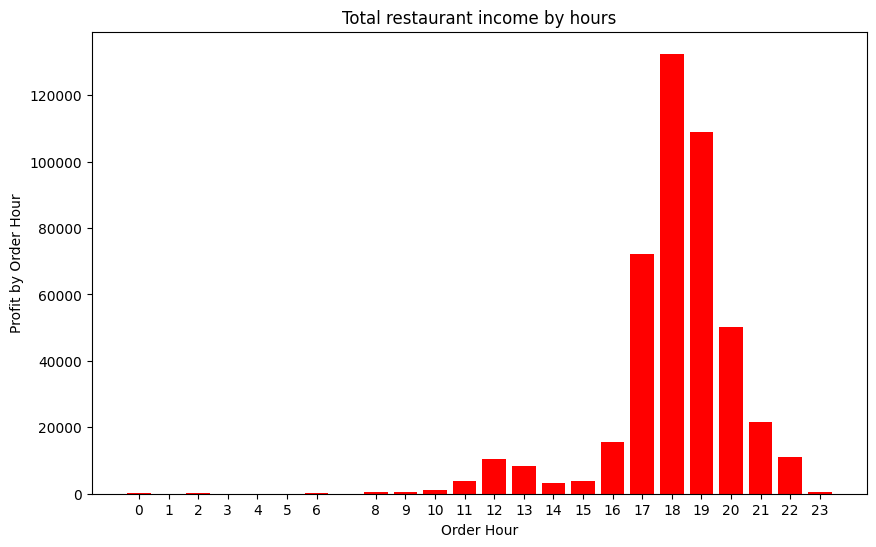

,id,quantity,order_id,product_id,id,datetime,id,price,name,item_price,order_hour
0,1,2,1,6,1,2019-08-03 20:25:00,6,0.80,Plain Papadum,1.60,20
1,2,1,1,240,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti,12.95,20
2,3,1,1,19,1,2019-08-03 20:25:00,19,2.95,Garlic Naan,2.95,20
3,4,1,1,36,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice,3.95,20
4,5,1,1,111,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala,8.95,20
...,...,...,...,...,...,...,...,...,...,...,...
74813,74814,2,3255,247,3255,2016-05-18 18:53:00,247,17.95,House Red wine 75cl,35.90,18
74814,74815,2,12905,247,12905,2016-05-14 19:28:00,247,17.95,House Red wine 75cl,35.90,19
74815,74816,2,3272,247,3272,2016-05-10 13:18:00,247,17.95,House Red wine 75cl,35.90,13
74816,74817,1,11404,248,11404,2016-04-07 19:04:00,248,17.95,House white wine 75cl,17.95,19


In [11]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
income_by_hours = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(10, 6))
plt.bar(income_by_hours.index, income_by_hours.values, color="red")
plt.xlabel("Order Hour")
plt.ylabel("Profit by Order Hour")
plt.title("Total restaurant income by hours")
plt.xticks(income_by_hours.index)
plt.show()
df

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

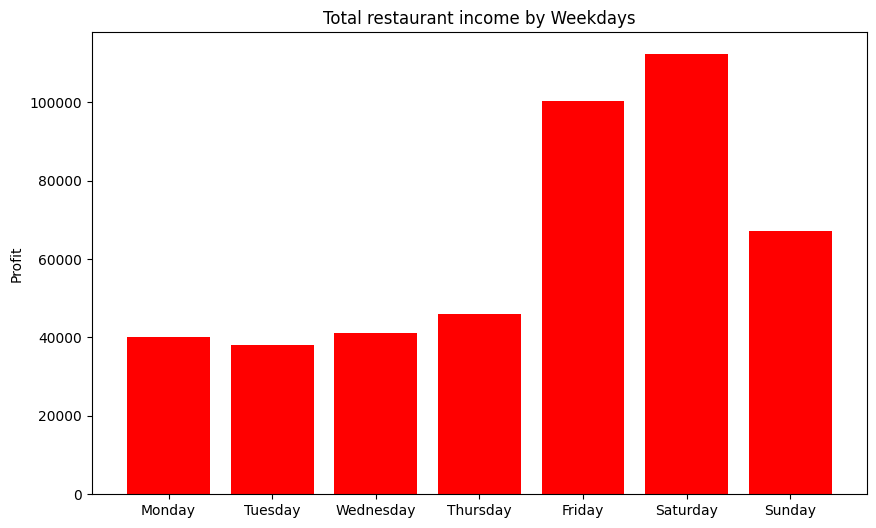

In [18]:
df["order_day"] = df["datetime"].dt.day_name()
income_by_weekdays = df.groupby("order_day")["item_price"].sum()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
income_by_weekdays = income_by_weekdays.reindex(weekdays)

plt.figure(figsize=(10, 6))
plt.bar(income_by_weekdays.index, income_by_weekdays.values, color="red")
plt.ylabel("Profit")
plt.title("Total restaurant income by Weekdays")
plt.show()